In [123]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
import hydra
import matplotlib.pyplot as plt
import numpy as np
import torch
import xarray as xr

In [127]:
from crims2s.dataset import S2SDataset, TransformedDataset, netcdf_file_groups

from crims2s.transform import AddLatLonFeature, AddBiweeklyDimTransform, CompositeTransform, LongitudeRoll, MembersSubsetTransform

In [135]:
with hydra.initialize_config_module('crims2s.training.conf'):
    cfg = hydra.compose('config', overrides=['experiment/dataset=ncep', 'experiment/transform=full', 'experiment.transform.roll=True'])

***REMOVED***/lib/python3.8/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'config': Defaults list is missing `_self_`. See https://hydra.cc/docs/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [136]:
t = hydra.utils.instantiate(cfg.experiment.transform)


In [137]:
d = S2SDataset(cfg.experiment.dataset.dataset_dir)

In [138]:
d = TransformedDataset(d, t)

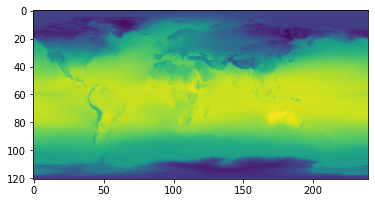

In [143]:
plt.imshow(d[0]['model_parameters_t2m_mu'][0])

In [134]:
MembersSubsetTransform(1)(d[0])['features']

<xarray.Dataset>
Dimensions:            (realization: 1, lead_time: 6, latitude: 121, longitude: 240, variable: 14)
Coordinates:
  * realization        (realization) int64 9
  * lead_time          (lead_time) timedelta64[ns] 1 days 8 days ... 36 days
    forecast_time      datetime64[ns] ...
  * latitude           (latitude) float64 90.0 88.5 87.0 ... -87.0 -88.5 -90.0
  * longitude          (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
    valid_time         (lead_time) datetime64[ns] ...
    forecast_monthday  object ...
    forecast_year      int64 ...
  * variable           (variable) object 'lsm' 'msl' 'siconc' ... 'v200' 'v850'
Data variables:
    features           (lead_time, latitude, longitude, realization, variable) float32 ...

In [90]:
features = LongitudeRoll()(AddLatLonFeatureXarray()(d[0]))['features']

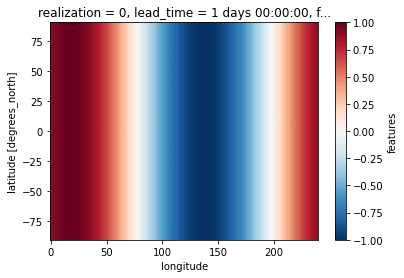

In [91]:
features.sel(variable='lon').isel(lead_time=0, realization=0).features.plot()

In [54]:
features['features']

<xarray.DataArray 'features' (lead_time: 6, latitude: 121, longitude: 240, realization: 11, variable: 15)>
array([[[[[ 0.00000000e+00,  1.90544538e-02,  2.22407007e+00, ...,
           -2.41898274e+00, -8.24112654e-01, -4.52237427e-01],
          [ 0.00000000e+00,  2.69855708e-02,  2.21753049e+00, ...,
           -2.60720181e+00, -1.03433597e+00, -4.52237427e-01],
          [ 0.00000000e+00,  2.98696142e-02,  2.23313832e+00, ...,
           -2.27338576e+00, -7.82203257e-01, -4.52237427e-01],
          ...,
          [ 0.00000000e+00, -1.10477451e-02,  2.22738338e+00, ...,
           -2.43569064e+00, -9.20774877e-01, -4.52237427e-01],
          [ 0.00000000e+00,  2.28397585e-02,  2.22529078e+00, ...,
           -2.37226892e+00, -7.55840838e-01, -4.52237427e-01],
          [ 0.00000000e+00, -2.76251771e-02,  2.22293639e+00, ...,
           -2.44830680e+00, -9.53220904e-01, -4.52237427e-01]],

         [[ 0.00000000e+00,  1.90544538e-02,  2.22407007e+00, ...,
           -2.41898274e+00, -8.24112654e-01, -4.52237427e-01],
          [ 0.00000000e+00,  2.69855708e-02,  2.21753049e+00, ...,
           -2.60720181e+00, -1.03433597e+00, -4.52237427e-01],
          [ 0.00000000e+00,  2.98696142e-02,  2.23313832e+00, ...,
           -2.27338576e+00, -7.82203257e-01, -4.52237427e-01],
...
          [ 0.00000000e+00, -9.61787641e-01,  0.00000000e+00, ...,
            1.51638702e-01, -4.75993693e-01,  2.83836961e+00],
          [ 0.00000000e+00, -1.26700196e-02,  0.00000000e+00, ...,
           -3.08338553e-01, -5.51701069e-01,  2.83836961e+00],
          [ 0.00000000e+00, -2.85904020e-01,  0.00000000e+00, ...,
            2.39269644e-01, -6.36585876e-02,  2.83836961e+00]],

         [[ 1.00000000e+00, -4.93717909e-01,  0.00000000e+00, ...,
           -9.98415425e-03, -1.39366016e-01,  2.83836961e+00],
          [ 0.00000000e+00, -1.05118716e+00,  0.00000000e+00, ...,
            1.09205174e+00, -5.01394086e-02,  2.83836961e+00],
          [ 0.00000000e+00, -1.83712378e-01,  0.00000000e+00, ...,
           -6.73865318e-01, -1.96822554e-01,  2.83836961e+00],
          ...,
          [ 0.00000000e+00, -9.61787641e-01,  0.00000000e+00, ...,
            1.51638702e-01, -4.75993693e-01,  2.83836961e+00],
          [ 0.00000000e+00, -1.26700196e-02,  0.00000000e+00, ...,
           -3.08338553e-01, -5.51701069e-01,  2.83836961e+00],
          [ 0.00000000e+00, -2.85904020e-01,  0.00000000e+00, ...,
            2.39269644e-01, -6.36585876e-02,  2.83836961e+00]]]]])
Coordinates:
  * variable           (variable) object 'lsm' 'msl' 'siconc' ... 'v850' 'orog'
  * realization        (realization) int64 0 1 2 3 4 5 6 7 8 9 10
  * lead_time          (lead_time) timedelta64[ns] 1 days 8 days ... 36 days
    forecast_time      datetime64[ns] 2000-01-02
  * latitude           (latitude) float64 90.0 88.5 87.0 ... -87.0 -88.5 -90.0
  * longitude          (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
    valid_time         (lead_time) datetime64[ns] 2000-01-03 ... 2000-02-07
    forecast_monthday  <U4 '0102'
    forecast_year      int64 2000
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2021-05-10T16:32 GRIB to CDM+CF via cfgrib-0.9.9...

In [37]:
features.assign(lon=features.longitude)

<xarray.Dataset>
Dimensions:            (realization: 11, lead_time: 6, latitude: 121, longitude: 240, variable: 15)
Coordinates:
  * realization        (realization) int64 0 1 2 3 4 5 6 7 8 9 10
  * lead_time          (lead_time) timedelta64[ns] 1 days 8 days ... 36 days
    forecast_time      datetime64[ns] 2000-01-02
  * latitude           (latitude) float64 90.0 88.5 87.0 ... -87.0 -88.5 -90.0
  * longitude          (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
    valid_time         (lead_time) datetime64[ns] 2000-01-03 ... 2000-02-07
    forecast_monthday  <U4 '0102'
    forecast_year      int64 2000
  * variable           (variable) object 'lsm' 'msl' 'siconc' ... 'v850' 'orog'
Data variables:
    features           (lead_time, latitude, longitude, realization, variable) float32 ...
    lon                (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5

In [18]:
d[0].keys()

dict_keys(['obs', 'terciles', 'edges', 'model_parameters', 'features', 'eccc_available', 'eccc_parameters', 'ncep_available', 'ncep_parameters'])

In [32]:
rolled = LongitudeRoll()(d[0])

In [34]:
rolled['features']

<xarray.Dataset>
Dimensions:            (realization: 11, lead_time: 6, latitude: 121, variable: 15, longitude: 240)
Coordinates:
  * realization        (realization) int64 0 1 2 3 4 5 6 7 8 9 10
  * lead_time          (lead_time) timedelta64[ns] 1 days 8 days ... 36 days
    forecast_time      datetime64[ns] 2000-01-02
  * latitude           (latitude) float64 90.0 88.5 87.0 ... -87.0 -88.5 -90.0
    valid_time         (lead_time) datetime64[ns] 2000-01-03 ... 2000-02-07
    forecast_monthday  <U4 '0102'
    forecast_year      int64 2000
  * variable           (variable) object 'lsm' 'msl' 'siconc' ... 'v850' 'orog'
Dimensions without coordinates: longitude
Data variables:
    features           (lead_time, latitude, longitude, realization, variable) float32 ...

In [13]:
netcdf_file_groups(d.dataset.files[0])

{'eccc_parameters',
 'edges',
 'features',
 'model',
 'model_parameters',
 'obs',
 'terciles'}

In [ ]:
sample = d[0]

In [ ]:
sample.keys()

In [ ]:
sample['eccc_available']

In [ ]:
plt.imshow(sample['eccc_parameters_tp_sigma'][0])

In [ ]:
d[0].keys()

In [ ]:
d[0]['features'].lead_time

In [ ]:
first_example = d[0]

In [ ]:
first_example['features_features'].shape

In [ ]:
lons = first_example['features_features'][..., -1]

In [ ]:
lats = first_example['features_features'][..., -2]

In [ ]:
first_example['features_features'].shape

In [ ]:
lons.max()

In [ ]:
plt.imshow(lons[0,0,:, :, 0])

In [ ]:
sorted(first_example.keys())

In [ ]:
first_example['latitude']

In [ ]:
latitude = first_example['latitude']

In [ ]:
weights = torch.where(latitude > -60.0, torch.cos(torch.deg2rad(torch.abs(latitude))), 0.0)

In [ ]:
weights

In [ ]:
plt.imshow(first_example['dry_mask_tp'][0])